In [48]:
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns

FILES_FOLDER = {
    "data_for_data_challenge": [
        "data_for_data_challenge/building_data.feather",
        "data_for_data_challenge/meter_data.feather",
        "data_for_data_challenge/weather_data.feather",  # The dataset test will be released one hour before the end of the Data Challenge
    ],
        "clean_data":["clean_data/merged_timestamp.feather"]

}


def load_data(folder, data_dir, dict_files=FILES_FOLDER):
    files = dict_files[folder]
    dataframes = []
    print(":: Start loading data")
    for name_file in tqdm(files):
        dataframe = pd.read_feather(os.path.join(data_dir, name_file))
        dataframes.append(dataframe)
    return dataframes


building, meters, weather = load_data("data_for_data_challenge", "")

merged_dataset=load_data("clean_data","")[0]

:: Start loading data


100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 18.14it/s]


:: Start loading data


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  3.57it/s]


In [49]:
merged_dataset.head()

,timestamp,building_id,meter,meter_reading,site_id,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,198,0,197.8700,2.0,15.6,-5.6,1015.5,270.0,3.6
1,2016-01-01 00:00:00,239,3,67.4063,2.0,15.6,-5.6,1015.5,270.0,3.6
2,2016-01-01 00:00:00,276,0,115.7400,2.0,15.6,-5.6,1015.5,270.0,3.6
3,2016-01-01 00:00:00,234,0,63.0700,2.0,15.6,-5.6,1015.5,270.0,3.6
4,2016-01-01 00:00:00,191,0,54.8500,2.0,15.6,-5.6,1015.5,270.0,3.6


In [50]:
list = ["building_id"]
merged_building_meters = meters.merge(building,
                   on = list, 
                   how = 'outer')

In [51]:
merged_building_meters.head()

,index_x,building_id,timestamp,meter,meter_reading,index_y,site_id,primary_use,sub_primary_use,square_feet,lat,lng,year_built
0,0,83,2017-01-11 09:00:00,0,1.0989,0,0,Other,Other,2070.0,28.52,-81.400002,1996.0
1,1,83,2016-03-21 22:00:00,0,0.0000,0,0,Other,Other,2070.0,28.52,-81.400002,1996.0
2,2,83,2016-04-29 20:00:00,0,0.0000,0,0,Other,Other,2070.0,28.52,-81.400002,1996.0
3,3,83,2017-01-15 06:00:00,0,2.7405,0,0,Other,Other,2070.0,28.52,-81.400002,1996.0
4,4,83,2017-02-06 20:00:00,0,2.1296,0,0,Other,Other,2070.0,28.52,-81.400002,1996.0


In [52]:
merged_building_meters.shape

(976896, 13)

In [53]:
merged_electricity=merged_building_meters[merged_building_meters['meter']==0]
merged_electricity = merged_electricity.drop_duplicates('building_id', keep="first")

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75],
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Residence Hall\t'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Parking Garage'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Residence Hall'),
  Text(6, 0, 'Classroom'),
  Text(7, 0, 'Research'),
  Text(8, 0, 'Stadium'),
  Text(9, 0, 'College Laboratory'),
  Text(10, 0, 'Gymnasium'),
  Text(11, 0, 'College Classroom'),
  Text(12, 0, 'Dormitory'),
  Text(13, 0, 'Planetarium'),
  Text(14, 0, 'Student Union'),
  Text(15, 0, 'Library'),
  Text(16, 0, 'Museum'),
  Text(17, 0, 'Health Services'),
  Text(18, 0, 'Sports Stadium')

/opt/miniconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


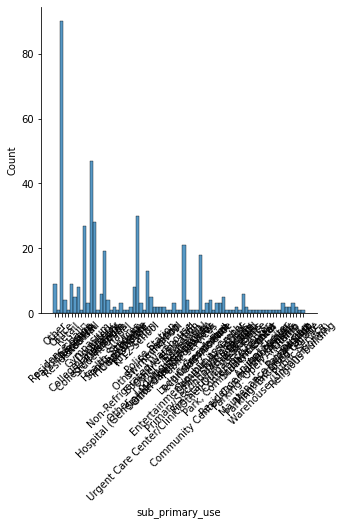

In [54]:
sns.displot(merged_electricity, x="sub_primary_use")
plt.xticks(rotation=45)

In [55]:
merged_chilledwater=merged_building_meters[merged_building_meters['meter']==1]
merged_chilledwater = merged_chilledwater.drop_duplicates('building_id', keep="first")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Classroom'),
  Text(1, 0, 'Office'),
  Text(2, 0, 'Dormitory'),
  Text(3, 0, 'College Classroom'),
  Text(4, 0, 'Planetarium'),
  Text(5, 0, 'Library'),
  Text(6, 0, 'Health Services'),
  Text(7, 0, 'Sports Stadium'),
  Text(8, 0, 'College Laboratory'),
  Text(9, 0, 'Central Plant'),
  Text(10, 0, 'Theater'),
  Text(11, 0, 'Student Union'),
  Text(12, 0, 'Fitness Center'),
  Text(13, 0, 'Swimming Pool'),
  Text(14, 0, 'Athletic Field'),
  Text(15, 0, 'Conference Center'),
  Text(16, 0, 'Museum'),
  Text(17, 0, 'Academic'),
  Text(18, 0, 'Student Center'),
  Text(19, 0, 'Hospital'),
  Text(20, 0, 'Auditorium'),
  Text(21, 0, 'Parking: Enclosed Garage'),
  Text(22, 0, 'Athletic'),
  Text(23, 0, 'Dining'),
  Text(24, 0, 'Research'),
  Text(25, 0, 'Patient Care'),
  Text(26, 0, 'Housing'),
  Text

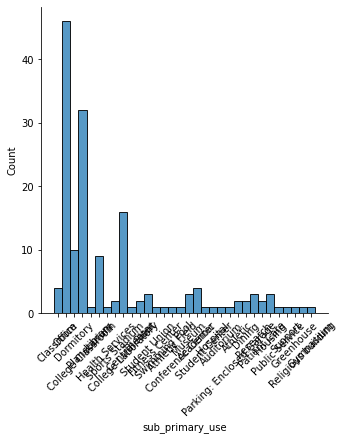

In [56]:
sns.displot(merged_chilledwater, x="sub_primary_use")
plt.xticks(rotation=45)

In [57]:
merged_steam=merged_building_meters[merged_building_meters['meter']==2]
merged_steam = merged_steam.drop_duplicates('building_id', keep="first")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'College Classroom'),
  Text(1, 0, 'Dormitory'),
  Text(2, 0, 'Office'),
  Text(3, 0, 'Swimming Pool'),
  Text(4, 0, 'College Laboratory'),
  Text(5, 0, 'Athletic Field'),
  Text(6, 0, 'Sports Stadium'),
  Text(7, 0, 'Student Union'),
  Text(8, 0, 'Theater'),
  Text(9, 0, 'Conference Center'),
  Text(10, 0, 'Library'),
  Text(11, 0, 'Museum'),
  Text(12, 0, 'Greenhouse'),
  Text(13, 0, 'Maintenance Repair Shop'),
  Text(14, 0, 'Parking: Enclosed Garage'),
  Text(15, 0, 'Dining'),
  Text(16, 0, 'Research'),
  Text(17, 0, 'Patient Care'),
  Text(18, 0, 'Housing'),
  Text(19, 0, 'Support')])

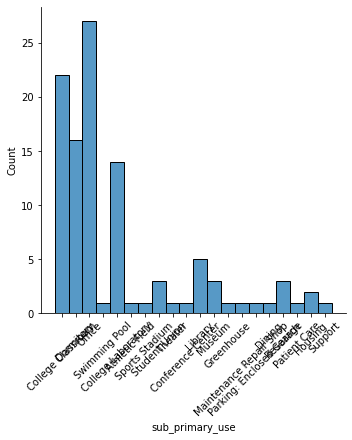

In [58]:
sns.displot(merged_steam, x="sub_primary_use")
plt.xticks(rotation=45)

In [59]:
merged_hotwater=merged_building_meters[merged_building_meters['meter']==3]
merged_hotwater = merged_hotwater.drop_duplicates('building_id', keep="first")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'College Laboratory'),
  Text(1, 0, 'Dormitory'),
  Text(2, 0, 'College Classroom'),
  Text(3, 0, 'Office'),
  Text(4, 0, 'Planetarium'),
  Text(5, 0, 'Sports Stadium'),
  Text(6, 0, 'Fitness Center'),
  Text(7, 0, 'Academic'),
  Text(8, 0, 'Student Center'),
  Text(9, 0, 'Athletic'),
  Text(10, 0, 'Research'),
  Text(11, 0, 'Library'),
  Text(12, 0, 'Housing'),
  Text(13, 0, 'Dining'),
  Text(14, 0, 'Public Service'),
  Text(15, 0, 'Patient Care'),
  Text(16, 0, 'Support'),
  Text(17, 0, 'Gymnasium')])

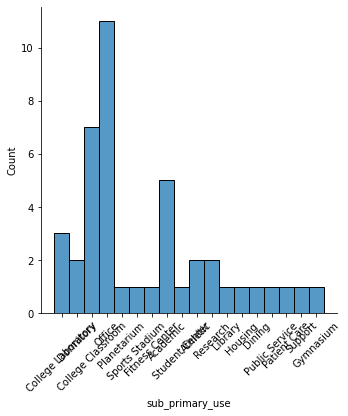

In [60]:
sns.displot(merged_hotwater, x="sub_primary_use")
plt.xticks(rotation=45)